In [82]:
#패키지를 불러옵니다.
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib as mpl

#주피터 노트북내에 그림을 표시 합니다.
%matplotlib inline

# 폰트 설정
mpl.rc('font', family='Malgun Gothic')

#그래프의 폰트를 선명하게 출력합니다.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 그래프 음수값 깨짐 방지
mpl.rc('axes', unicode_minus=False)

In [83]:
df = pd.read_csv('data/SCALE불량.csv', encoding='CP949')
df

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,PB563502,2008-08-02:13:35:36,불량,NK-KA,C0,20.14,3580,38639,21870,3호기,...,1172,72,1164,62,245,1164,1005,적용,8,2조
716,PB563503,2008-08-02:13:35:02,양품,NV-A32,C0,15.08,3212,48233,18340,2호기,...,1150,61,1169,61,238,1169,947,적용,10,1조
717,PB563504,2008-08-02:14:40:00,양품,NV-A32,C0,16.60,3441,43688,19590,2호기,...,1169,65,1163,77,247,1163,948,적용,10,4조
718,PB563505,2008-08-02:13:35:19,양품,LR-A,C0,15.59,3363,48740,80240,3호기,...,1179,86,1163,45,243,1163,940,적용,10,2조


In [84]:
# 각 호기에 따른 불량품의 비율
df['SCALE(양품)'] = df['SCALE'].replace(['양품','불량'],[1,0]) # 양품의 개수
df['SCALE(불량)'] = df['SCALE'].replace(['양품','불량'],[0,1]) # 불량품의 개수

rt = pd.pivot_table(data=df, index='FUR_NO', values=['SCALE(양품)','SCALE(불량)'], aggfunc=sum) # sum으로 피봇팅하여 개수를 세고
rt['비율'] = rt['SCALE(불량)'] / (rt['SCALE(불량)'] + rt['SCALE(양품)']) * 100 # 비율 계산
rt  # 3호기가 불량률이 높믐

,SCALE(불량),SCALE(양품),비율
FUR_NO,,,
1호기,73,167,30.416667
2호기,70,167,29.535865
3호기,88,155,36.213992


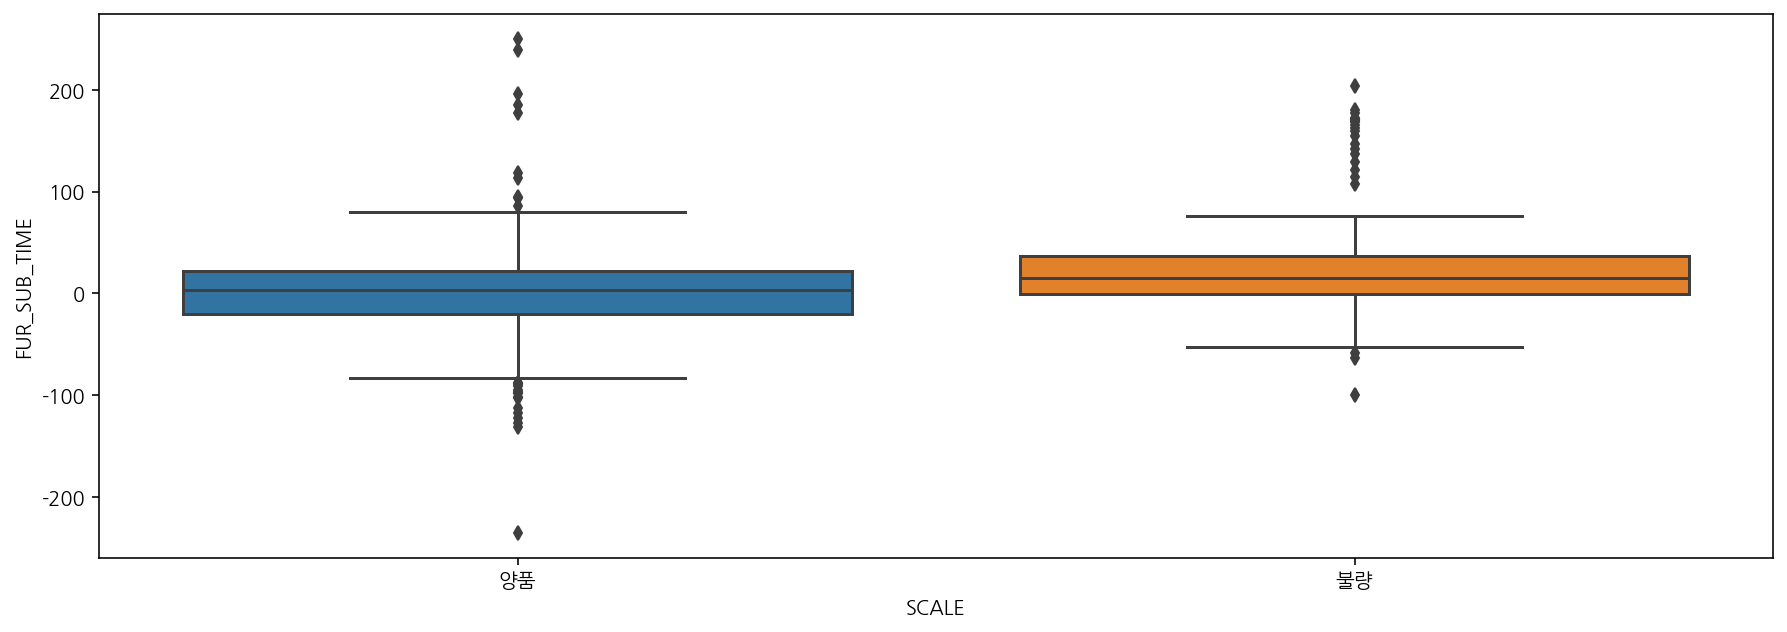

In [85]:
# FUR_HZ_TIME의 차이에 따른 양품, 불량 발생률
# 양품과 불량품을 비교하면 양품이 0에 더 가까움
df['FUR_SUB_TIME'] = df.FUR_HZ_TIME - df.FUR_SZ_TIME
plt.figure(figsize=[15,5])
sns.boxplot(data = df, x='SCALE', y='FUR_SUB_TIME')

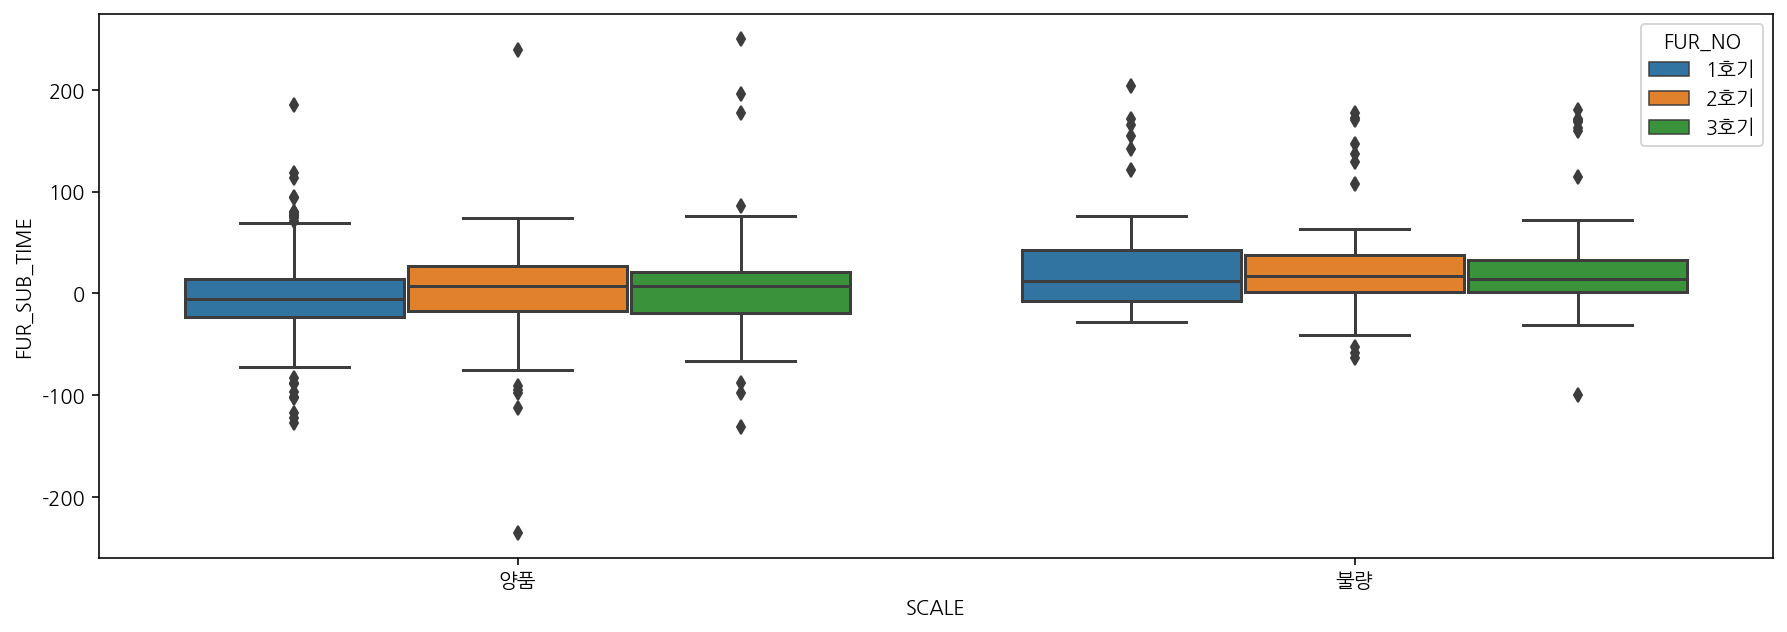

In [86]:
# 각 호기로 나누고 각 호기에 따라 FUR_TIME 비교
df['FUR_SUB_TIME'] = df.FUR_HZ_TIME - df.FUR_SZ_TIME
plt.figure(figsize=[15,5])
sns.boxplot(data = df, x='SCALE', y='FUR_SUB_TIME', hue='FUR_NO')

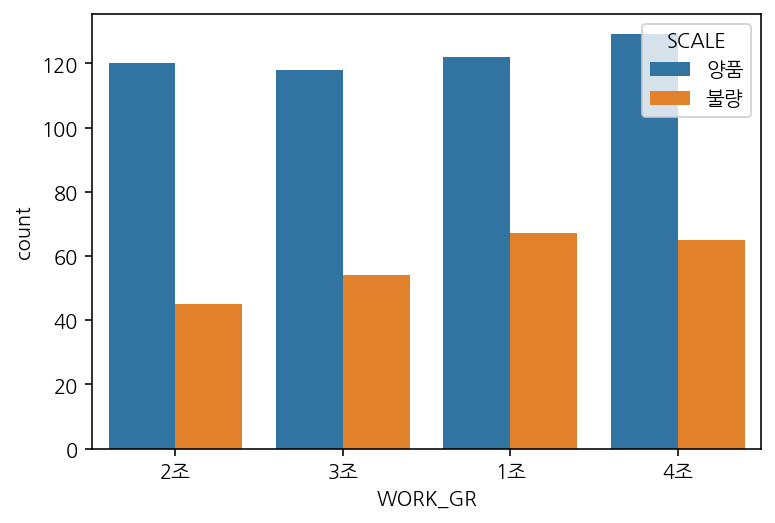

In [87]:
# WORK_GR에 따른 양품, 불량 갯수
sns.countplot(data=df, x='WORK_GR', hue='SCALE')

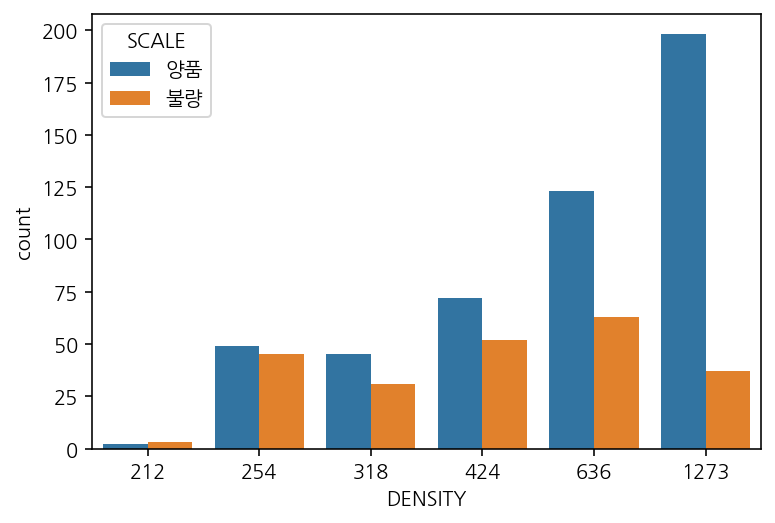

In [88]:
# 밀도에 따른 불량품의 개수
#'PT_THK','PT_WDTH', 'PT_LTH', 'PT_WGT'
# bin의 갯수를 줄이기 위한 함수
def fun(n):
    return int(n/100) 
df['DENSITY'] = ((df.PT_THK * df.PT_WDTH * df.PT_LTH) / df.PT_WGT ).apply(fun) # 밀도
sns.countplot(data=df, x='DENSITY', hue = 'SCALE')
# 밀도가 127 * 100 에 근사할수록 양품의 비율이 증가함